## Model 3: Image Classification with CNN
Setting up a convolutional neural network for digit classification using the MNIST dataset.

In [1]:
# Reset for a new project
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import datetime
import wandb

# Start a new wandb run
wandb.init(project="mnist-classification", name="mnist-cnn-model")

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data for CNN input (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

# Display info about the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train_onehot.shape}")
print(f"Test labels shape: {y_test_onehot.shape}")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: pns00911 (pns00911-san-jose-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


## Visualizing MNIST Sample Images
Displaying samples from each digit class to understand what our model will be classifying.

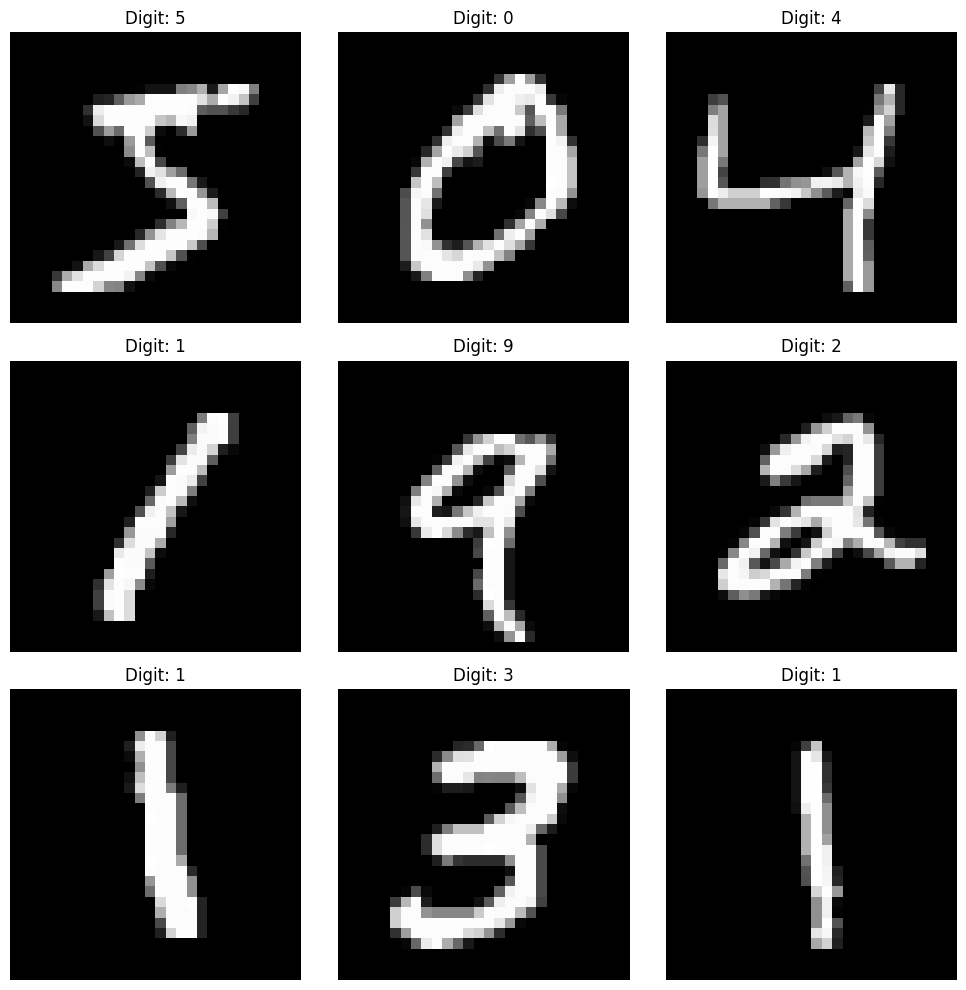

In [2]:
# Visualize some sample images from the MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples.png')
plt.show()

# Log to wandb
wandb.log({
    "mnist_samples": wandb.Image('mnist_samples.png')
})

## Building the CNN Architecture
Creating a convolutional neural network with multiple conv layers, pooling layers, and dense layers.

In [3]:
# Define the CNN model architecture
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # 10 output classes for 10 digits
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN Model
Training the convolutional neural network with early stopping to prevent overfitting.

In [4]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True
)

# Train the model
history = model.fit(
    X_train, y_train_onehot,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, tensorboard_callback],
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8364 - loss: 0.5023 - val_accuracy: 0.9799 - val_loss: 0.0680
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9790 - loss: 0.0646 - val_accuracy: 0.9881 - val_loss: 0.0437
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.9867 - loss: 0.0429 - val_accuracy: 0.9894 - val_loss: 0.0378
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9883 - loss: 0.0361 - val_accuracy: 0.9891 - val_loss: 0.0392
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.9911 - loss: 0.0293 - val_accuracy: 0.9899 - val_loss: 0.0356
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9907 - val_loss: 0.0365
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9941 - loss: 0.0172 - val_accuracy: 0.9909 - val_loss: 0.0350
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9946 - loss: 0.0164 - 

## Visualizing Training History
Plotting the accuracy and loss curves during training to analyze model convergence.

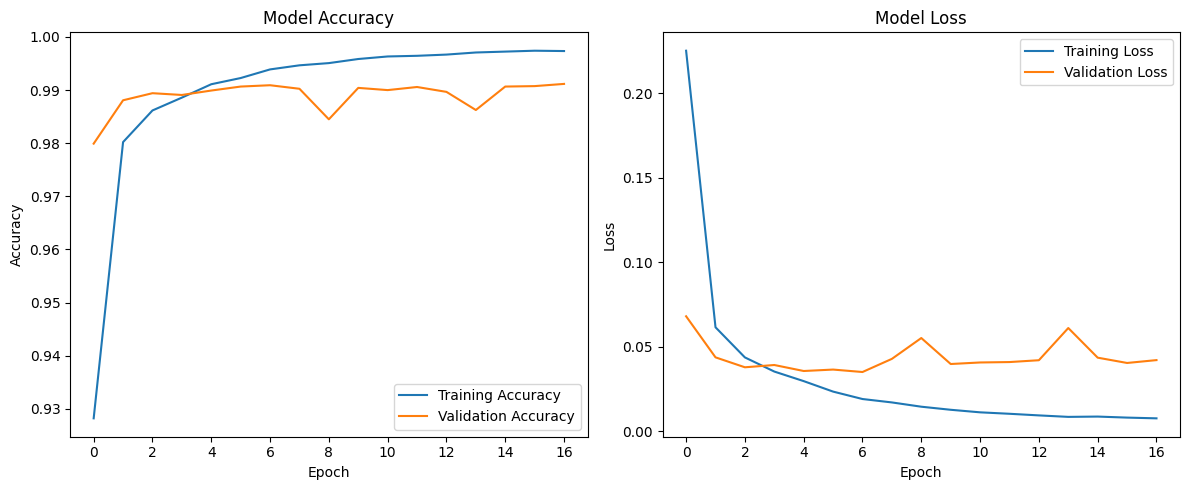

In [5]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history_cnn.png')
plt.show()

# Log to wandb
wandb.log({
    "final_test_accuracy": test_accuracy,
    "training_history": wandb.Image('training_history_cnn.png')
})

## Computing Classification Metrics
Calculating precision, recall, F1-score, and generating a confusion matrix to evaluate model performance.

In [6]:
# Get model predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate classification report
print("\nClassification Report:")
target_names = [str(i) for i in range(10)]  # Digit names: '0' through '9'
print(classification_report(y_test, y_pred, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
Classification Metrics:
Accuracy: 0.9922
Precision: 0.9922
Recall: 0.9922
F1 Score: 0.9922

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Visualizing the Confusion Matrix
Creating a heatmap to visualize the confusion matrix showing correct and incorrect predictions.

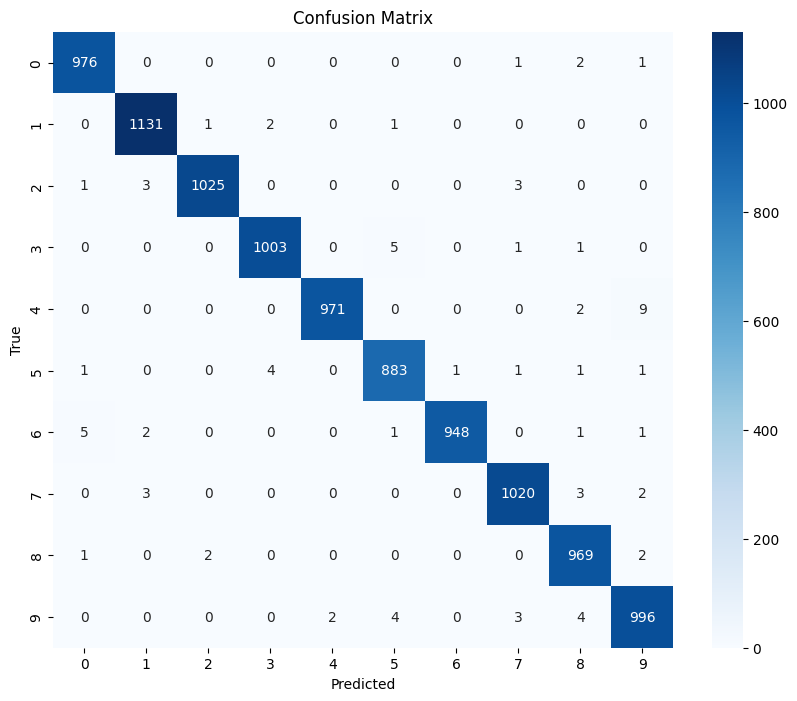

In [8]:
# Import seaborn for the heatmap
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_cnn.png')
plt.show()

# Log to wandb
wandb.log({
    "confusion_matrix": wandb.Image('confusion_matrix_cnn.png'),
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1
})

## Visualizing Model Predictions
Displaying examples of correctly and incorrectly classified digits to better understand model behavior.

Number of correctly classified samples: 9922
Number of incorrectly classified samples: 78


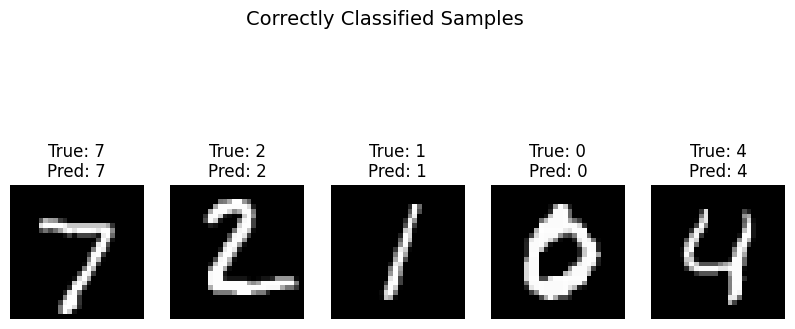

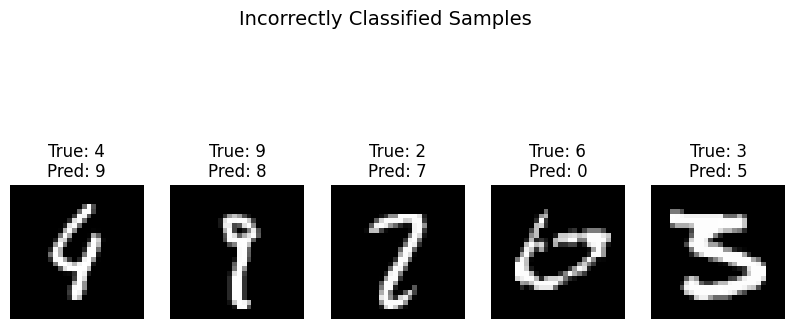

In [9]:
# Get indices of correctly and incorrectly classified samples
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

print(f"Number of correctly classified samples: {len(correct_indices)}")
print(f"Number of incorrectly classified samples: {len(incorrect_indices)}")

# Visualize some correctly classified samples
plt.figure(figsize=(10, 5))
plt.suptitle('Correctly Classified Samples', fontsize=14)
for i in range(5):
    plt.subplot(1, 5, i+1)
    idx = correct_indices[i]
    plt.imshow(X_test[idx, :, :, 0], cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.savefig('correct_predictions.png')
plt.show()

# Visualize some incorrectly classified samples
plt.figure(figsize=(10, 5))
plt.suptitle('Incorrectly Classified Samples', fontsize=14)
for i in range(5):
    if i < len(incorrect_indices):
        plt.subplot(1, 5, i+1)
        idx = incorrect_indices[i]
        plt.imshow(X_test[idx, :, :, 0], cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
plt.savefig('incorrect_predictions.png')
plt.show()

# Log to wandb
wandb.log({
    "correct_predictions": wandb.Image('correct_predictions.png'),
    "incorrect_predictions": wandb.Image('incorrect_predictions.png')
})

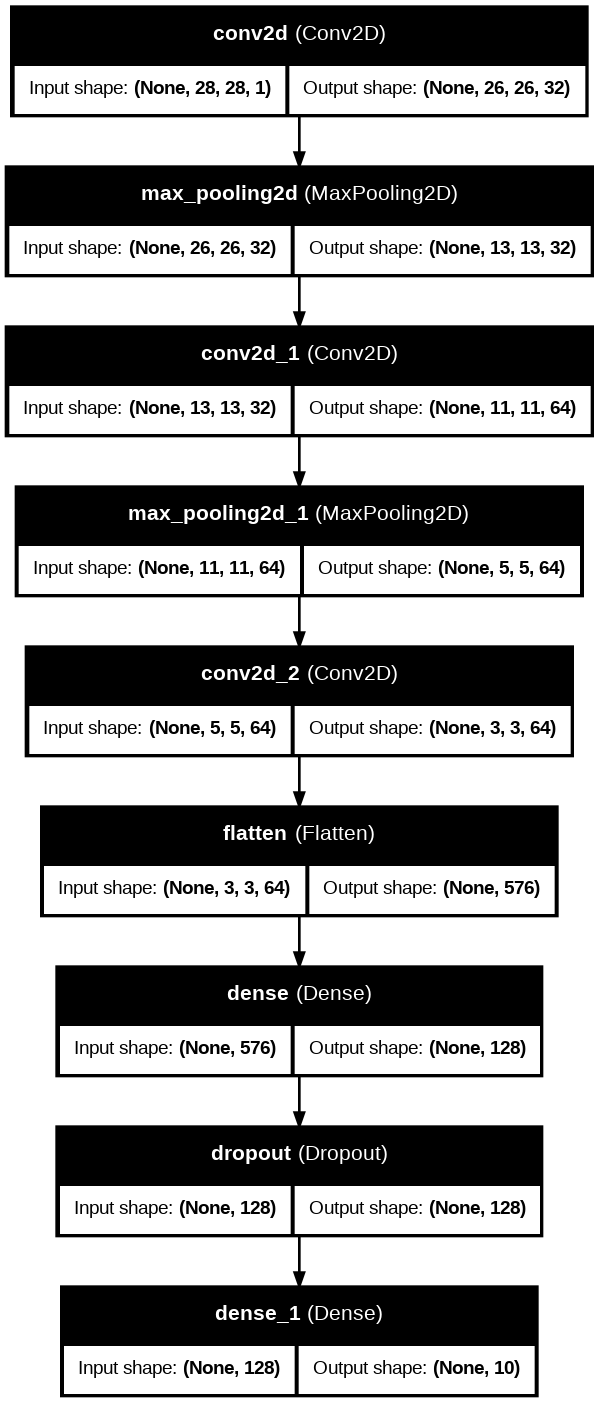

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 392,672 (1.50 MB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 261,782 (1022.59 KB)

In [15]:
# Create a model diagram visualization
from tensorflow.keras.utils import plot_model

# Generate the model diagram
plot_model(model, to_file='cnn_model_diagram.png', show_shapes=True, show_layer_names=True, dpi=96)

# Display the model diagram
from IPython.display import Image
display(Image('cnn_model_diagram.png'))

# You can also print a summary of the model architecture
model.summary()

## Final Analysis for CNN Image Classification Model
Summarizing the performance metrics and generating a comprehensive report for the MNIST CNN model.

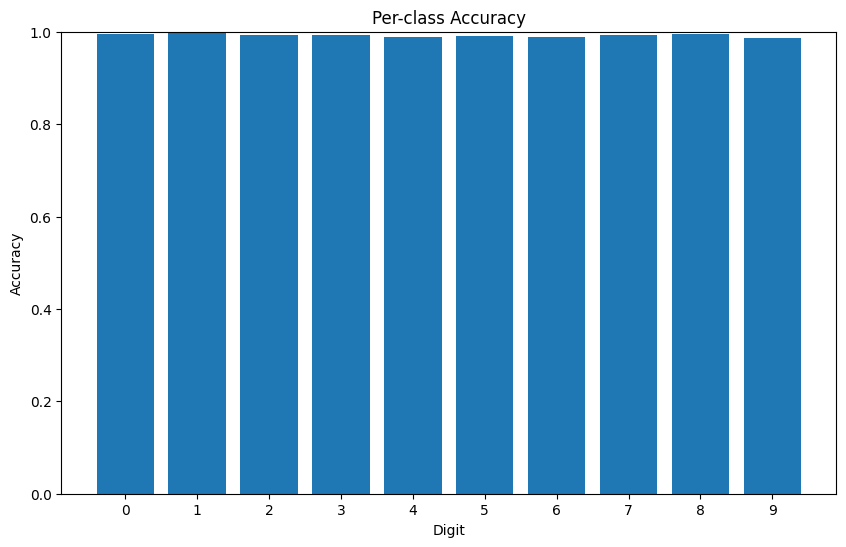

CNN MODEL SUMMARY
-----------------
Overall Accuracy: 0.9922
Precision: 0.9922
Recall: 0.9922
F1 Score: 0.9922

Per-class Accuracy:
Digit 0: 0.9959
Digit 1: 0.9965
Digit 2: 0.9932
Digit 3: 0.9931
Digit 4: 0.9888
Digit 5: 0.9899
Digit 6: 0.9896
Digit 7: 0.9922
Digit 8: 0.9949
Digit 9: 0.9871


In [14]:
# Initialize a new wandb run
wandb.init(project="mnist-classification", name="mnist-cnn-final")

# Per-class accuracy analysis
class_accuracy = {}

for i in range(10):
    # Get samples for this class
    class_indices = np.where(y_test == i)[0]
    class_correct = np.sum(y_pred[class_indices] == y_test[class_indices])
    class_accuracy[i] = class_correct / len(class_indices)

# Plot per-class accuracy
plt.figure(figsize=(10, 6))
plt.bar(range(10), [class_accuracy[i] for i in range(10)])
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.title('Per-class Accuracy')
plt.xticks(range(10))
plt.ylim([0, 1])
plt.savefig('per_class_accuracy.png')
plt.show()

# Log to wandb
wandb.log({
    "per_class_accuracy": wandb.Image('per_class_accuracy.png')
})

# Create a summary for our CNN model
with open('cnn_model_summary.txt', 'w') as f:
    f.write("# MNIST CNN Classification Model Summary\n\n")

    f.write("## Model Architecture\n")
    f.write("- Input: 28x28x1 grayscale images\n")
    f.write("- Conv2D: 32 filters, 3x3 kernel, ReLU activation\n")
    f.write("- MaxPooling2D: 2x2 pool size\n")
    f.write("- Conv2D: 64 filters, 3x3 kernel, ReLU activation\n")
    f.write("- MaxPooling2D: 2x2 pool size\n")
    f.write("- Conv2D: 64 filters, 3x3 kernel, ReLU activation\n")
    f.write("- Flatten\n")
    f.write("- Dense: 128 units, ReLU activation\n")
    f.write("- Dropout: 0.2 rate\n")
    f.write("- Dense: 10 units, softmax activation\n\n")

    f.write("## Performance Metrics\n")
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"Precision: {precision:.4f}\n")
    f.write(f"Recall: {recall:.4f}\n")
    f.write(f"F1 Score: {f1:.4f}\n\n")

    f.write("## Per-class Accuracy\n")
    for i in range(10):
        f.write(f"Digit {i}: {class_accuracy[i]:.4f}\n")

    f.write("\n## Error Analysis\n")
    f.write(f"Total test samples: {len(y_test)}\n")
    f.write(f"Correctly classified: {len(correct_indices)}\n")
    f.write(f"Incorrectly classified: {len(incorrect_indices)}\n")

# Print out the summary
print("CNN MODEL SUMMARY")
print("-----------------")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nPer-class Accuracy:")
for i in range(10):
    print(f"Digit {i}: {class_accuracy[i]:.4f}")

# Finalize the wandb run
wandb.finish()